<center>
    <h1> Blai Ras Jimenez </h1>
</center>

# Assignment 3: Epidemic data of COVID-19 in Catalonia

The [datoscovid.cat website](https://dadescovid.cat/?lang=cas) comes into operation 28th of July 2020 to monitor the epidemiological epidemic of COVID-19 in Catalonia. 

You can also find other onteresting data in [transparenciacatalunya.cat](https://analisi.transparenciacatalunya.cat/Salut/Registre-de-defuncions-per-COVID-19-a-Catalunya-Se/uqk7-bf9s).



## Exercise:


We propose you to explore the Covid-19 data of Catalonia and analyze the following aspects:
1. Relationship between information of population of the municipality and the number of Covid-19 cases on it.
2. Relationship between information of economy of the catalan region and the number of Covid-19 cases on it.
3. Analysis of the differences of Covid-19 affecting women and men in Catalonia

After analyzing thea relationships you should be able to answer the following **questions**:

From the analysisi 1:
1. Do larger municipalities have a higher incidence of covid?
2. In Catalunya, the bigger the city the denser it is?
3. Do municipalities with a higher population density have a higher incidence of covid?

From the analysisi 2:
4. Do richer regions have a lower incidence of covid?

From the analysisi 3:
5. Does Covid-19 affect men more than women?
6. What age groups does Covid-19 affect the most for men and women?


Please, answer the questions, and extract and write conclusions from the three anlysis. 

Optional: you can think other possible questions which can be solved after these analyzes.

Please, upload this notebook and the used files.


# 1. Relationship between the municipality's population and the number of Covid-19 cases

## Data from COVID-19 and municipality

Our first objective is to plot relationship between information of population of the municipalities and the number of Covid-19 cases on these municipalities.

For that, we need access to Covid-19 data and data from the municipalities in Catalonia that can be achieved from [datoscovid.cat](https://dadescovid.cat/) and from [IDESCAT](https://www.idescat.cat). 

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of population for the municipalities with more than 20.000 people (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=250)): "aec-250.csv"


### Some help for the exercise:

- Load the two tables (casos_sexe_municipi.csv and aec-250.csv) as dataframes
- Clean the data and prepare it for the analysis (there are empty rows in the csv)
- Merge the two tables:
    - For the correct matching, check if the name of the municipalities are all the same in the two tables.
- Plot the relationship between population and covid cases.
    - Remove outliers if there are.
- Instead of using global numbers, compute the covid incidence as a ratio of cases per habitant and do the plot again.
- Answer the posed questions.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
path = "data/" #path to my data folder 

### AEC250 Cleaning

The `aec250.csv` is horribly formated. After a look with some text editor you can see that the header names can be read in the first 5 rows. I stored / hard-coded them in the list named ``header``. \
Therefore, I pass the ``skiprows=5,header=None`` params when reading the CSV. I also remove all the rows that have NaN values. I assign to this dataframe the hard-coded header names and make sure that the name of the municipalities are lower-cased, for later comparison. Also, I set as name of the column of the name of the municipalities "MUNICIPIDESCRIPCIO", the same as the ``casos_sexe_municipi.csv``. 

In [110]:
header = ["MUNICIPIDESCRIPCIO","Num. Habitants","Superficie","Densitat","Rang per nombre d'hab"]
aec250 = pd.read_csv(path+'aec-250.csv',skiprows=5,header=None, skip_blank_lines=True).dropna()
aec250.columns = header
aec250["MUNICIPIDESCRIPCIO"] = aec250["MUNICIPIDESCRIPCIO"].str.lower()
aec250.head()

,MUNICIPIDESCRIPCIO,Num. Habitants,Superficie,Densitat,Rang per nombre d'hab
0,barcelona,1636762.0,101.4,16149.6,1.0
1,hospitalet de llobregat. l',264923.0,12.4,21364.8,2.0
2,terrassa,220556.0,70.2,3143.6,3.0
3,badalona,220440.0,21.2,10407.9,4.0
4,sabadell,213644.0,37.8,5653.5,5.0


### Merging

In the following cell I read the ``casos_sexe_municipi.csv`` dataframe. I remove all the NaN's and set to lower-case the strings of the "MUNICIPIDESCRIPCIO" column. 



In [111]:
casosMun = pd.read_csv(path+"casos_sexe_municipi.csv",sep=";").dropna()
casosMun["MUNICIPIDESCRIPCIO"] = casosMun["MUNICIPIDESCRIPCIO"].str.lower()
casosMun.head()

,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,29/04/2020,21,MARESME,08110,malgrat de mar,1,Dona,Positiu per Test Ràpid,6
1,03/07/2020,40,VALLES OCCIDENTAL,08125,montcada i reixac,1,Dona,Positiu per ELISA,1
2,28/07/2020,11,BAIX LLOBREGAT,08217,sant joan despí,1,Dona,Positiu per Test Ràpid,7
3,25/07/2020,13,BARCELONES,08101,l'hospitalet de llobregat,0,Home,PCR probable,6
4,28/08/2020,11,BAIX LLOBREGAT,08200,sant boi de llobregat,1,Dona,Positiu per ELISA,1


The reason I lower case all the municipalities is because that will be my pivoting column for the merge of both dataframes. Nevertheless, as we can see below, there are 4 names that are different even though they're lower-cased: the ones with a preceding article. \
Therefore, I hard-coded the replace for this values.

In [112]:
mun = casosMun.MUNICIPIDESCRIPCIO.unique()
mun[:10]

array(['malgrat de mar', 'montcada i reixac', 'sant joan despí',
       "l'hospitalet de llobregat", 'sant boi de llobregat', 'barcelona',
       'cornellà de llobregat', 'sitges', 'abrera', 'xerta'], dtype=object)

In [113]:
aec250["MUNICIPIDESCRIPCIO"] = aec250["MUNICIPIDESCRIPCIO"].replace(
    {"hospitalet de llobregat. l'":"l'hospitalet de llobregat",
     "prat de llobregat. el":"el prat de llobregat",
     "vendrell. el":"el vendrell",
     "masnou. el":"el masnou",
     "franqueses del vallès. les":"les franqueses del vallès"})

Now we can do the inner join. As we can see below, all the municipalities are present.

In [114]:
data = pd.merge(aec250,casosMun,on="MUNICIPIDESCRIPCIO",how="inner")
data.head()

,MUNICIPIDESCRIPCIO,Num. Habitants,Superficie,Densitat,Rang per nombre d'hab,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,barcelona,1636762.0,101.4,16149.6,1.0,11/04/2020,13,BARCELONES,08019,0,Home,PCR probable,7
1,barcelona,1636762.0,101.4,16149.6,1.0,17/04/2020,13,BARCELONES,08019,1,Dona,Positiu per Test Ràpid,69
2,barcelona,1636762.0,101.4,16149.6,1.0,15/04/2020,13,BARCELONES,08019,0,Home,Positiu per ELISA,6
3,barcelona,1636762.0,101.4,16149.6,1.0,18/04/2020,13,BARCELONES,08019,1,Dona,Positiu per ELISA,30
4,barcelona,1636762.0,101.4,16149.6,1.0,06/10/2020,13,BARCELONES,08019,1,Dona,Positiu per ELISA,7


In [115]:
data.MUNICIPIDESCRIPCIO.nunique(),aec250.MUNICIPIDESCRIPCIO.nunique()

(66, 66)

### Relationship between population and covid cases

In order to see if there's correlation between the population and the number of Covid cases I created a dataframe with the sum of Covid cases by municipalities. 

In [116]:
correlationCases = data.groupby(["MUNICIPIDESCRIPCIO","Num. Habitants"])["NUMCASOS"].agg("sum").reset_index()
correlationCases.head()

,MUNICIPIDESCRIPCIO,Num. Habitants,NUMCASOS
0,amposta,20738.0,859
1,badalona,220440.0,9956
2,barberà del vallès,33091.0,1115
3,barcelona,1636762.0,72038
4,blanes,39028.0,1207


#### Outliers

As we can see below, we need to remove Barcelona because of its huge population, specially when compared with all the 64 others.

In [117]:
#This function recieves a dataframe and two column's as axis y and x.
#Is a helper that plots data and regression models so we can visually see possible correlations.

import seaborn as sns
def plot_corr(df,x,y):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)

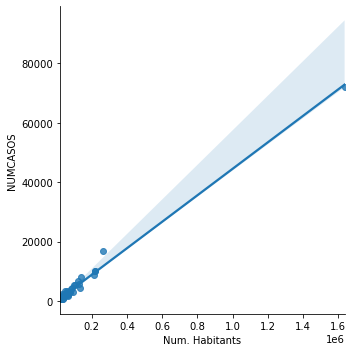

In [118]:
plot_corr(correlationCases,'Num. Habitants',"NUMCASOS")

In [119]:
correlationCases = correlationCases[correlationCases.MUNICIPIDESCRIPCIO != "barcelona"]

Now, the correlation plot looks better, but in my opinion we need to remove more outliers. 

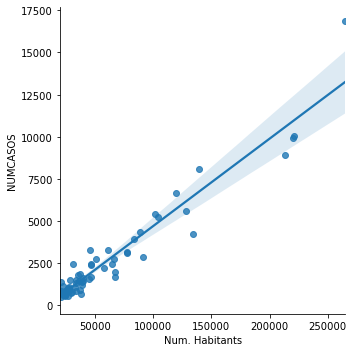

In [120]:
plot_corr(correlationCases,'Num. Habitants',"NUMCASOS")

In [123]:
correlationCases.corr()[["NUMCASOS"]]

,NUMCASOS
Num. Habitants,0.961561
NUMCASOS,1.000000


An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean. \
This computation is also known as Z-Score, which scipy is able to compute for me. Below we can see that with this metric I removed 3 municipalities:

In [124]:
#This function recieves a dataframe and a list with column names.
#Returns another dataframe with the outliers removed of the columns present in the list.

from scipy import stats
def remove_outliers(df,columns):
    z_scores = stats.zscore(df[columns])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    no_outliers = df[filtered_entries]
    print("Old dataframe shape: ",df.shape,"\nNew Dataframe with no outliers:",no_outliers.shape)
    return no_outliers

In [125]:
no_outliers = remove_outliers(correlationCases.drop(["MUNICIPIDESCRIPCIO"],axis=1),["Num. Habitants"])

Old dataframe shape:  (65, 2) 
New Dataframe with no outliers: (62, 2)


Plot again the new dataframe. We can see that the correlation index, computed with the Pearson coefficient has decreased, but overall **we can confirm that there's correlation** between the number of cases and the population of the municipalities.

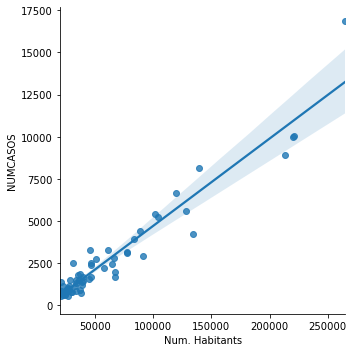

In [126]:
plot_corr(correlationCases,'Num. Habitants',"NUMCASOS")

In [127]:
no_outliers.corr()[["NUMCASOS"]]

,NUMCASOS
Num. Habitants,0.942419
NUMCASOS,1.000000


### Ratio per habitant

I compute the ratio dividing the number of cases and the population of a region. I called this column "Cases x Habitant" and I proceed to repeat the plots with this new metric.

In [128]:
no_outliers["Cases x Habitant"] = no_outliers["NUMCASOS"] / no_outliers["Num. Habitants"]
no_outliers.head()

,Num. Habitants,NUMCASOS,Cases x Habitant
0,20738.0,859,0.041422
2,33091.0,1115,0.033695
4,39028.0,1207,0.030927
5,26538.0,566,0.021328
6,33898.0,852,0.025134


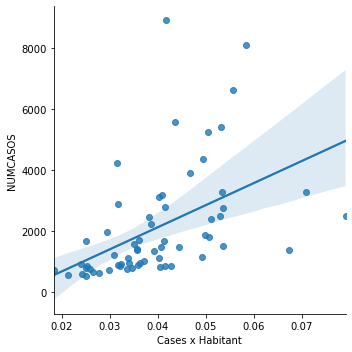

In [129]:
plot_corr(no_outliers,'Cases x Habitant',"NUMCASOS")

We can see already a strong correlation in this plot with this new ratio, but, let's compute it mathematically:

In [130]:
no_outliers.corr()[["NUMCASOS"]]

,NUMCASOS
Num. Habitants,0.942419
NUMCASOS,1.000000
Cases x Habitant,0.482908


### Relationship between region area and density

For this question I need to plot the density and surface columns.

In [131]:
comparison = data[["MUNICIPIDESCRIPCIO","Densitat","Superficie"]].drop_duplicates()
comparison.head()

,MUNICIPIDESCRIPCIO,Densitat,Superficie
0,barcelona,16149.6,101.4
1756,l'hospitalet de llobregat,21364.8,12.4
2875,terrassa,3143.6,70.2
3753,badalona,10407.9,21.2
4575,sabadell,5653.5,37.8


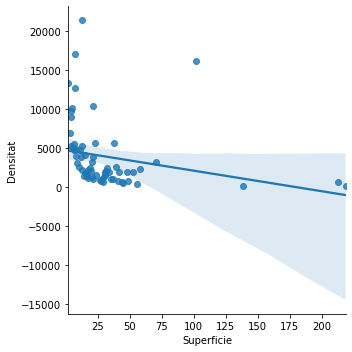

In [132]:
plot_corr(comparison,"Superficie","Densitat")

In [134]:
comparison.corr()[["Densitat"]]

,Densitat
Densitat,1.000000
Superficie,-0.242334


After seeing this numbers and this plot we can affirm that in Catalonia **we can't say** the bigger the region the denser it is.

### Relationship between municipalities population density and Covid cases

In this case I need to gather the Density column and also sum all the cases by municipality.

In [135]:
correlationDens = data.groupby(["MUNICIPIDESCRIPCIO","Densitat"])["NUMCASOS"].agg("sum").reset_index()
correlationDens.head()

,MUNICIPIDESCRIPCIO,Densitat,NUMCASOS
0,amposta,149.9,859
1,badalona,10407.9,9956
2,barberà del vallès,3982.1,1115
3,barcelona,16149.6,72038
4,blanes,2210.0,1207


As we can see below, we also need to remove outliers.

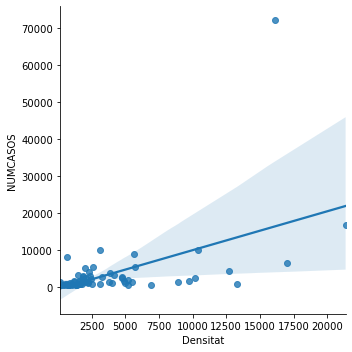

In [136]:
plot_corr(correlationDens,'Densitat',"NUMCASOS")

In [137]:
no_outliers = remove_outliers(correlationDens.drop(["MUNICIPIDESCRIPCIO"],axis=1),["Densitat"])

Old dataframe shape:  (66, 2) 
New Dataframe with no outliers: (64, 2)


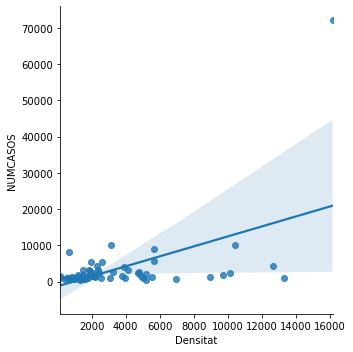

In [138]:
plot_corr(no_outliers,'Densitat',"NUMCASOS")

In [139]:
no_outliers.corr()[["NUMCASOS"]]

,NUMCASOS
Densitat,0.520245
NUMCASOS,1.000000


After watching the plot and the correlation between the cases and the density computed with the Pearson method we can assume that there's **no correlation** between a municipality density and Covid cases.

# 2. Relationship between catalan region economy and number of Covid-19 cases

## Data from COVID-19 and region (comarca)


For the second analysis, we can find data of the Territorial gross domestic product (GDP) (in catalan: Producte interior brut territorial (PIB)) (base 2017) for the anlaysis from [IDESCAT](https://www.idescat.cat/).

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of the Producte interior brut territorial (PIB) by region (in ctalan: comarca) (base 2017) (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=358)): "aec-358.csv"
- Population data by municipalities and regions (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=925&t=2019)): "aec-925.csv"


### AEC-358 Cleaning

First of all I read the `aec-358.csv` file and remove all the NaN's. I know that its column named "Comarques i Aran" will be the pivot column for the later merge, so it needs a little bit of pre-processing. First, I remove all the accents with the `.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')` command. Second, I lower-case all its values as seen before. Finally, I remove the "Catalunya" row, because it's not a region, just a sum-up. 

In [140]:
gdpReg = pd.read_csv(path+"aec-358.csv",decimal=",").dropna()
gdpReg["Comarca"] = gdpReg["Comarques i Aran"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
gdpReg = gdpReg[gdpReg["Comarca"] != "catalunya"]
gdpReg= gdpReg.drop(["Comarques i Aran"],axis=1)
gdpReg.head()

,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,Comarca
0,1505.9,34.1,109.4,alt camp
1,3168.4,23.2,74.2,alt emporda
2,3201.2,29.9,95.8,alt penedes
3,450.6,22.3,71.4,alt urgell
4,122.4,32.0,102.5,alta ribagorca


### Merge

In order to merge it with ``casos_sexe_municipi.csv``, its column "COMARCADESCRIPCIO" also needs some pre-processing. Apart from removing all the accents and lower-case all values as before, I also need to change the column name and to change the region name "Vall d'Aran" to "Aran", matching the same value in `aec-358.csv`,

Finally, I sum all the Covid cases grouping by "Comarca".

In [141]:
casesRegion = casosMun.copy()[["COMARCADESCRIPCIO","NUMCASOS"]]
casesRegion["Comarca"] = casesRegion["COMARCADESCRIPCIO"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
casesRegion = casesRegion.drop(["COMARCADESCRIPCIO"],axis=1)
casesRegion["Comarca"] = casesRegion["Comarca"].replace("vall d'aran","aran")
casesRegion = casesRegion.groupby("Comarca").sum().reset_index()
casesRegion.head()

,Comarca,NUMCASOS
0,alt camp,973
1,alt emporda,5001
2,alt penedes,3104
3,alt urgell,683
4,alta ribagorca,64


In [142]:
covidRegion = pd.merge(gdpReg,casesRegion,on="Comarca",how="inner")
covidRegion.head()

,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,Comarca,NUMCASOS
0,1505.9,34.1,109.4,alt camp,973
1,3168.4,23.2,74.2,alt emporda,5001
2,3201.2,29.9,95.8,alt penedes,3104
3,450.6,22.3,71.4,alt urgell,683
4,122.4,32.0,102.5,alta ribagorca,64


Asserting that all the regions are present:

In [143]:
gdpReg.Comarca.nunique(),casesRegion.Comarca.nunique(),covidRegion.shape

(42, 42, (42, 5))

Let's plot as before the two variables possible-correlated: cases and PIB. As we can see below, we can suspect there's a correlation but we need to remove some regions (outliers) because either its PIB and its cases are too big. 

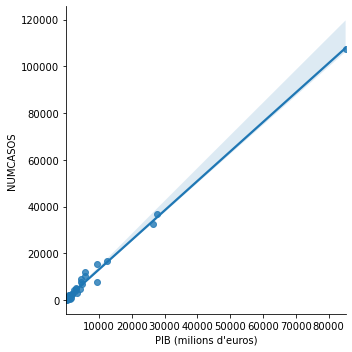

In [144]:
plot_corr(covidRegion,"PIB (milions d'euros)",'NUMCASOS')

Correlation values:

In [145]:
covidRegion.corr()[["NUMCASOS"]]

,NUMCASOS
PIB (milions d'euros),0.996865
PIB per habitant (milers d'euros),0.287050
Índex Catalunya = 100,0.288231
NUMCASOS,1.000000


Removing outliers:

In [146]:
no_outliers = remove_outliers(covidRegion,["PIB (milions d'euros)"])

Old dataframe shape:  (42, 5) 
New Dataframe with no outliers: (41, 5)


After removing outliers we can see a clear correlation between the PIB and the Covid cases. Therefore, we can say that richer regions (PIB represents the value of all goods and services produced over a specific time period within a region) have a **higher** incidence of Covid cases, not lower.

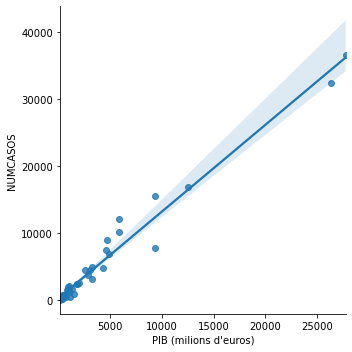

In [147]:
plot_corr(no_outliers,"PIB (milions d'euros)",'NUMCASOS')

In [148]:
no_outliers.corr()

,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,NUMCASOS
PIB (milions d'euros),1.000000,0.185315,0.185752,0.984471
PIB per habitant (milers d'euros),0.185315,1.000000,0.999988,0.134973
Índex Catalunya = 100,0.185752,0.999988,1.000000,0.135379
NUMCASOS,0.984471,0.134973,0.135379,1.000000


# 3. Analyze the differences of Covid-19 affecting women and men in Catalonia

The last objective is to analyze the difference between the incidence of Covid-19 in women and men for all the municipalities in Catalonia. For that we just need access data of number of cases per sex and minicipality and build a population pyramid over ages, ss the one presented here:
https://altair-viz.github.io/gallery/us_population_pyramid_over_time.html

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and age (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_edat.csv"


### Reading 

``casos_sexe_edat.csv`` needs no cleaning except for NaN-removal. Its weirdly encoded so we need to add the ``engine="python"`` command.

In [149]:
population = pd.read_csv(path+"casos_sexe_edat.csv",sep=";",engine="python").dropna()
population.head()

,TIPUSCASDATA,REGIOSANITARIACODI,REGIOSANITARIADESCRIPCIO,EDATRANG,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,18/09/2020,7802,METROPOLITANA NORD,10-19,1.0,Dona,Positiu per ELISA,2
1,09/09/2020,6200,CAMP DE TARRAGONA,40-49,1.0,Dona,PCR probable,1
2,29/11/2020,7803,BARCELONA CIUTAT,30-39,0.0,Home,Positiu per ELISA,1
3,08/04/2020,7802,METROPOLITANA NORD,90+,1.0,Dona,Positiu per ELISA,1
4,10/11/2020,6100,LLEIDA,30-39,1.0,Dona,Positiu per Test Ràpid,1


As we can see above, we need to pivot this dataframe in order to get the sum of number of cases separated by sex and grouped by age range. The Pandas `pivot_table` command suits perfectly for this problem:

In [151]:
plot_data = pd.pivot_table(population,values="NUMCASOS",columns=["SEXEDESCRIPCIO"],index=["EDATRANG"],aggfunc=["sum"])
plot_data.columns = plot_data.columns.droplevel()
plot_data = plot_data.rename_axis(None).reset_index().sort_values("index",ascending=False)
plot_data.head()

SEXEDESCRIPCIO,index,Dona,Home
10,No classificat,640,688
9,90+,10845,3421
8,80-89,16897,10636
7,70-79,15014,14323
6,60-69,20503,19719


Now we can plot a pyramid plot of ages:

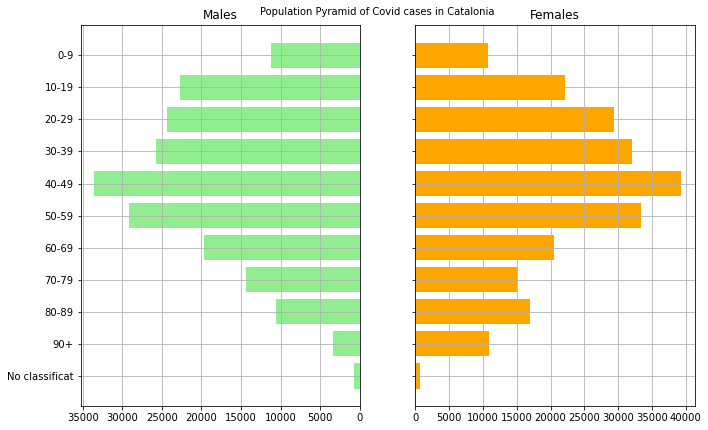

In [152]:
#define x and y limits
y = range(0, len(plot_data))
x_male = plot_data['Home']
x_female = plot_data['Dona']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(11, 7))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:white')
plt.figtext(.5,.9,"Population Pyramid of Covid cases in Catalonia", fontsize=10, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='lightgreen')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='orange')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=plot_data['index'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

We also need to check the global sum of Covid cases by sex:

In [153]:
population.groupby("SEXEDESCRIPCIO")["NUMCASOS"].sum()

SEXEDESCRIPCIO
Dona    230939
Home    195563
Name: NUMCASOS, dtype: int64

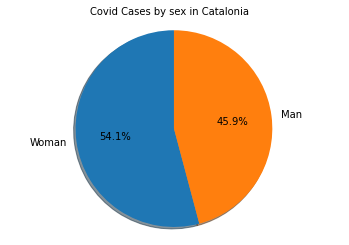

In [154]:
labels = 'Woman', 'Man'
sizes = [230939, 195563]
fig1, ax1 = plt.subplots()
plt.figtext(.5,.9,"Covid Cases by sex in Catalonia", fontsize=10, ha='center')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Now we can perform the analysis. As we can see above, there are registered more Covid cases in woman than man. Specifically, there are 35376 more Covid cases registered in woman than man. 

About the age groups, we can see that the group with most registered Covid cases is the 40-49 one, both in man and woman. In fact, the age-range between 30 and 59 years old is the worse by difference, that's why we see a contracting shaped pyramid: its wide in the middle. 

Nevertheless, we have to take in consideration that we are not seeing the number of individuals in each age group. Let me explain: in Catalonia there are more individuals in the age range of 30-59 than in any other group. Therefore, we can't assume that Covid affects more heavily people between 40 and 49 years old than people between 80-90+, because theres a lot less individuals in the 80-90+ age group. We need percentages!

## Optional

### Possible question: what insights can we extract from Sanitary regions?

Let's study this Covid impact with another approach: dividing the territory by sanitary regions and not municipaities or "comarques". In fact, I'm going to study the Covid cases on man and woman by sanitary region, trying to see what regions got most cases and what regions woman were more affected than man.

For that, let's pivot again my table but this time I'm indexing by sanitary region and not age:

In [155]:
sanReg = pd.pivot_table(population,values="NUMCASOS",columns=["SEXEDESCRIPCIO"],index=["REGIOSANITARIADESCRIPCIO"],aggfunc=["sum"])
sanReg.columns = sanReg.columns.droplevel()
sanReg = sanReg.rename_axis(None).reset_index()
sanReg.head()

SEXEDESCRIPCIO,index,Dona,Home
0,ALT PIRINEU I ARAN,2297,1942
1,BARCELONA CIUTAT,52843,44564
2,CAMP DE TARRAGONA,14869,12710
3,CATALUNYA CENTRAL,18329,14847
4,GIRONA,26127,21831


To make things clearer I'm going to create two more columns with the total amount of cases and the difference between man cases and woman cases.

In [156]:
sanReg["Diff"] = abs(sanReg["Dona"] - sanReg["Home"])
sanReg["Total"] = sanReg["Dona"] + sanReg["Home"]

In [157]:
sanReg.sort_values("Diff",ascending=False)

SEXEDESCRIPCIO,index,Dona,Home,Diff,Total
1,BARCELONA CIUTAT,52843,44564,8279,97407
6,METROPOLITANA NORD,57597,49968,7629,107565
7,METROPOLITANA SUD,42102,34914,7188,77016
4,GIRONA,26127,21831,4296,47958
3,CATALUNYA CENTRAL,18329,14847,3482,33176
2,CAMP DE TARRAGONA,14869,12710,2159,27579
5,LLEIDA,13088,11410,1678,24498
0,ALT PIRINEU I ARAN,2297,1942,355,4239
9,TERRES DE L'EBRE,3683,3369,314,7052
8,No classificat,4,8,4,12


As we can see below, on each region **woman gather the most covid cases**. The sanitary regions with the most Covid cases are those around Barcelona, confirming the theory that larger municipalities have a higher incidence of covid. 

The largest difference between woman and man cases therefore also happen in the Barcelona-related sanitary regions. One interesting point is that there are more cases in Barcelona surrounding north (METROPOLITANA NORD) than in the proper Barcelona city.

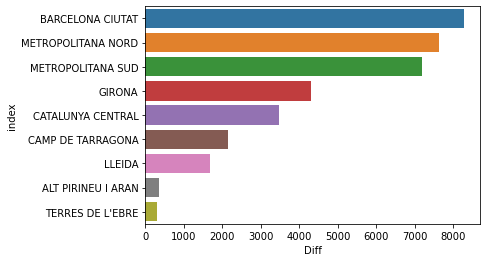

In [158]:
ax = sns.barplot(x="Diff", y="index", data=sanReg.drop([8]).sort_values("Diff",ascending=False))

Above I show a bar plot with the most difference between woman and man cases.